**Data Source:** https://www.kaggle.com/datasets/willianoliveiragibin/casino-gaming-data

**Scenario:**
An online casino consortium has noticed fluctuations in its revenue and wants to understand the underlying causes. They want insights into which platforms perform best, how promotions impact revenue, and how different casinos compare in performance.

**Problem Statements:**
1. Revenue Trends Analysis:  
    o How has the total gaming revenue changed over time?  
    o Are there seasonal trends in casino revenue?

2. Impact of Promotions:  
    o Do promotional credits and deductions lead to higher overall revenue?  
    o Is there a correlation between promotional spending and net winnings?

3. Casino Performance Comparison:  
    o Which casino licenses generate the highest revenue?  
    o Are there specific casinos consistently underperforming?

4. Wagering and Payout Patterns:  
    o How do cancelled wagers impact revenue?  
    o What percentage of wagers is typically returned as winnings?


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [ ]:
# Set plot styles
plt.style.use('ggplot')
sns.set()

In [24]:
# Load the Dataset
df = pd.read_csv('/content/Casino_Gaming_Data new.csv')
df.head(10)

,Fiscal Year,Month Ending,Licensee,Wagers,Patron Winnings,Cancelled Wagers,Online Casino Gaming Win/(Loss),Promotional Coupons or Credits Wagered (3),Promotional Deduction (4),Total Gross Gaming Revenue,Payment (5)
0,2021/22,06/30/2022 12:00:00 AM,Mohegan Tribe On-Reservation,379023,335505,5,43513,6390,6390,37123,6682
1,2021/22,06/30/2022 12:00:00 AM,MPTN On-Reservation,671843,685886,3,-14046,29041,0,-14046,0
2,2021/22,06/30/2022 12:00:00 AM,"MPI Master Wagering License CT, LLC",420056291,406814933,164727,13076631,12372142,3269158,9807473,1765345
3,2021/22,06/30/2022 12:00:00 AM,"Mohegan Digital, LLC",254393582,246515856,11645,7866081,1397441,1397441,6468640,1164355
4,2021/22,05/31/2022 12:00:00 AM,Mohegan Tribe On-Reservation,716607,681306,0,35301,4130,4130,31171,5611
5,2021/22,05/31/2022 12:00:00 AM,MPTN On-Reservation,710829,684549,10,26270,22614,6568,19703,3546
6,2021/22,05/31/2022 12:00:00 AM,"MPI Master Wagering License CT, LLC",496904669,484267401,146970,12490298,29968316,3122574,9367723,1686190
7,2021/22,05/31/2022 12:00:00 AM,"Mohegan Digital, LLC",275818534,267451923,3887,8362724,1205520,1205520,7157204,1288297
8,2021/22,04/30/2022 12:00:00 AM,MPTN On-Reservation,1464737,1438677,0,26060,48032,6515,19545,3518
9,2021/22,04/30/2022 12:00:00 AM,"MPI Master Wagering License CT, LLC",475988357,462730802,210022,13047534,17431335,3261883,9785650,1761417


In [25]:
# Basic information and cleaning
# Gives datatypes, non-null counts, and memory usage - good to identify object vs numeric types and missing values
print(df.info())

# Counts how many missing values are in each column
print("\nMissing Values:\n", df.isnull().sum())

# Checks for and counts any duplicate rows
print("\nDuplicate Rows:\n", df.duplicated().sum())

# Remove duplicate rows to ensure accurate analysis
df = df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Fiscal Year                                 143 non-null    object
 1   Month Ending                                143 non-null    object
 2   Licensee                                    143 non-null    object
 3   Wagers                                      143 non-null    int64 
 4   Patron Winnings                             143 non-null    int64 
 5   Cancelled Wagers                            143 non-null    int64 
 6   Online Casino Gaming Win/(Loss)             143 non-null    int64 
 7   Promotional Coupons or Credits Wagered (3)  143 non-null    int64 
 8   Promotional Deduction (4)                   143 non-null    int64 
 9   Total Gross Gaming Revenue                  143 non-null    int64 
 10  Payment (5)               

In [28]:
# Convert date columns to datetime
df['Month Ending'] = pd.to_datetime(df['Month Ending'])
df['Fiscal Year'] = df['Fiscal Year'].astype(str)

In [30]:
# Descriptive Statistics
# Selects only numerical columns and prints out summary statistics (mean, std, max, min, etc.) for them
num_cols = df.select_dtypes(include=[np.number]).columns
print(df[num_cols].describe())

             Wagers  Patron Winnings  Cancelled Wagers  \
count  1.430000e+02     1.430000e+02      1.430000e+02   
mean   2.742207e+08     2.655218e+08      1.783408e+05   
std    2.815530e+08     2.725166e+08      2.826004e+05   
min    1.145280e+05     1.113650e+05      0.000000e+00   
25%    1.407190e+06     1.357855e+06      5.000000e+00   
50%    2.656540e+08     2.575127e+08      3.887000e+03   
75%    5.352846e+08     5.156584e+08      2.913700e+05   
max    7.838842e+08     7.573176e+08      1.133136e+06   

       Online Casino Gaming Win/(Loss)  \
count                     1.430000e+02   
mean                      8.520509e+06   
std                       8.921912e+06   
min                      -8.099000e+04   
25%                       3.713950e+04   
50%                       7.866081e+06   
75%                       1.587461e+07   
max                       2.570443e+07   

       Promotional Coupons or Credits Wagered (3)  Promotional Deduction (4)  \
count             

In [31]:
# Handle Missing Values
df = df.dropna()

**VISUALIZATION**

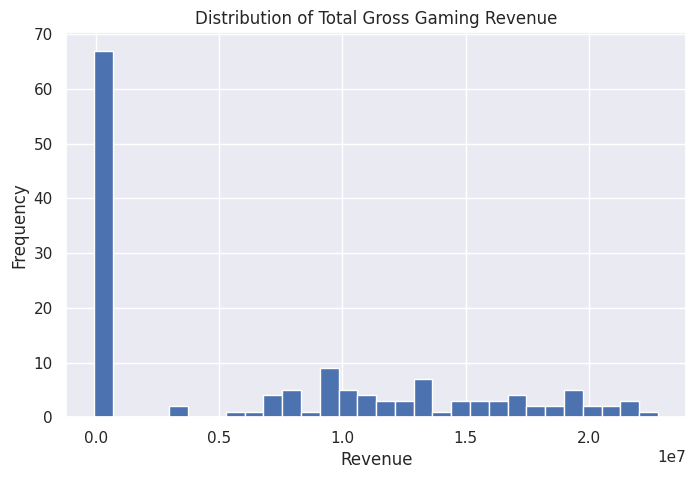

In [33]:
## Histogram - Total Gross Gaming Revenue
plt.figure(figsize=(8,5))
df['Total Gross Gaming Revenue'].hist(bins=30)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Total Gross Gaming Revenue')
plt.show()

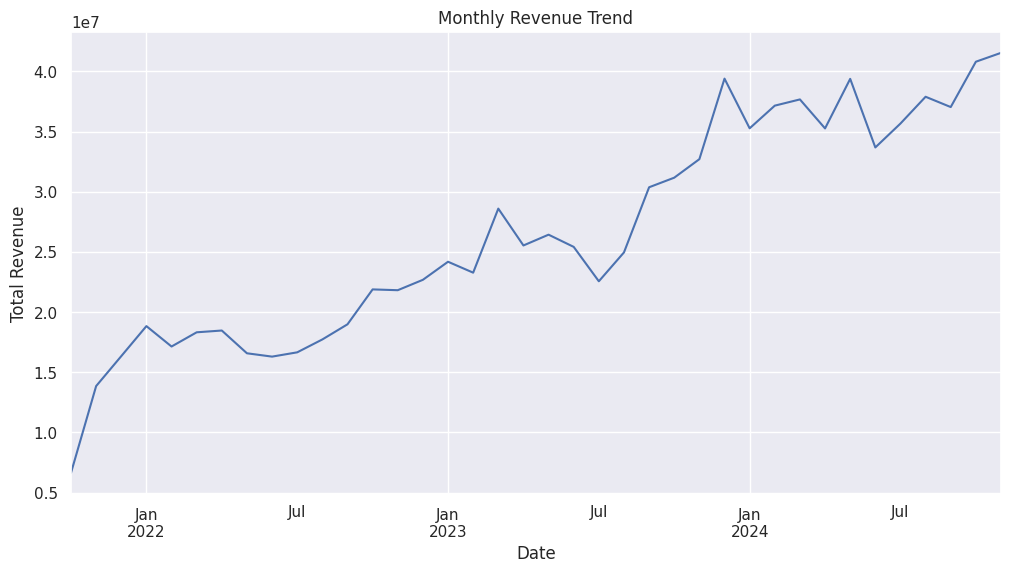

In [35]:
## Line Chart - Revenue over Time
monthly_revenue = df.groupby('Month Ending')['Total Gross Gaming Revenue'].sum()
plt.figure(figsize=(12,6))
monthly_revenue.plot()
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.show()

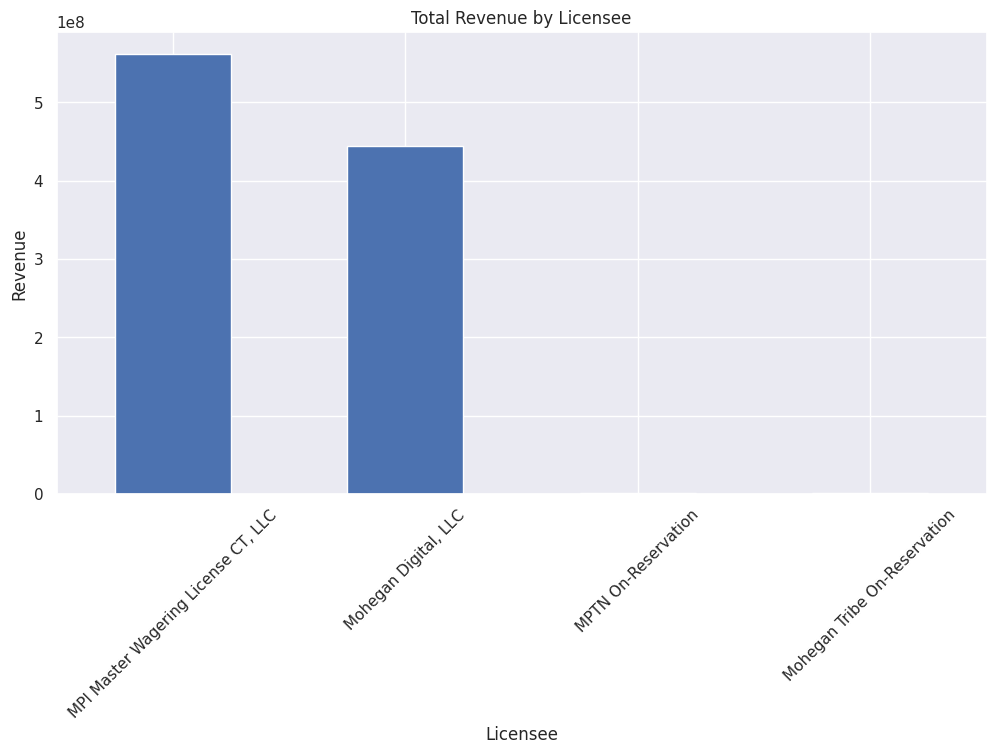

In [37]:
## Bar Chart - Revenue over Licensee
plt.figure(figsize=(12,6))
df.groupby('Licensee')['Total Gross Gaming Revenue'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.title('Total Revenue by Licensee')
plt.show()

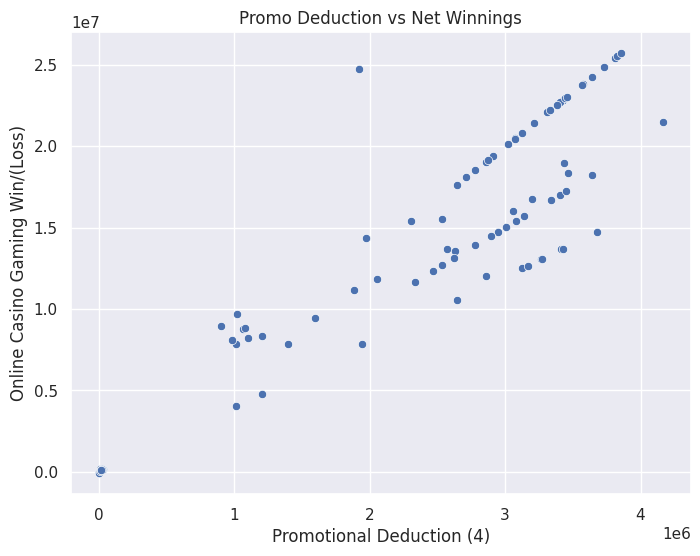

In [39]:
## Scatter Plot - Promotional Spend vs Net Winnings
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Promotional Deduction (4)',
    y='Online Casino Gaming Win/(Loss)'
)
plt.title('Promo Deduction vs Net Winnings')
plt.show()

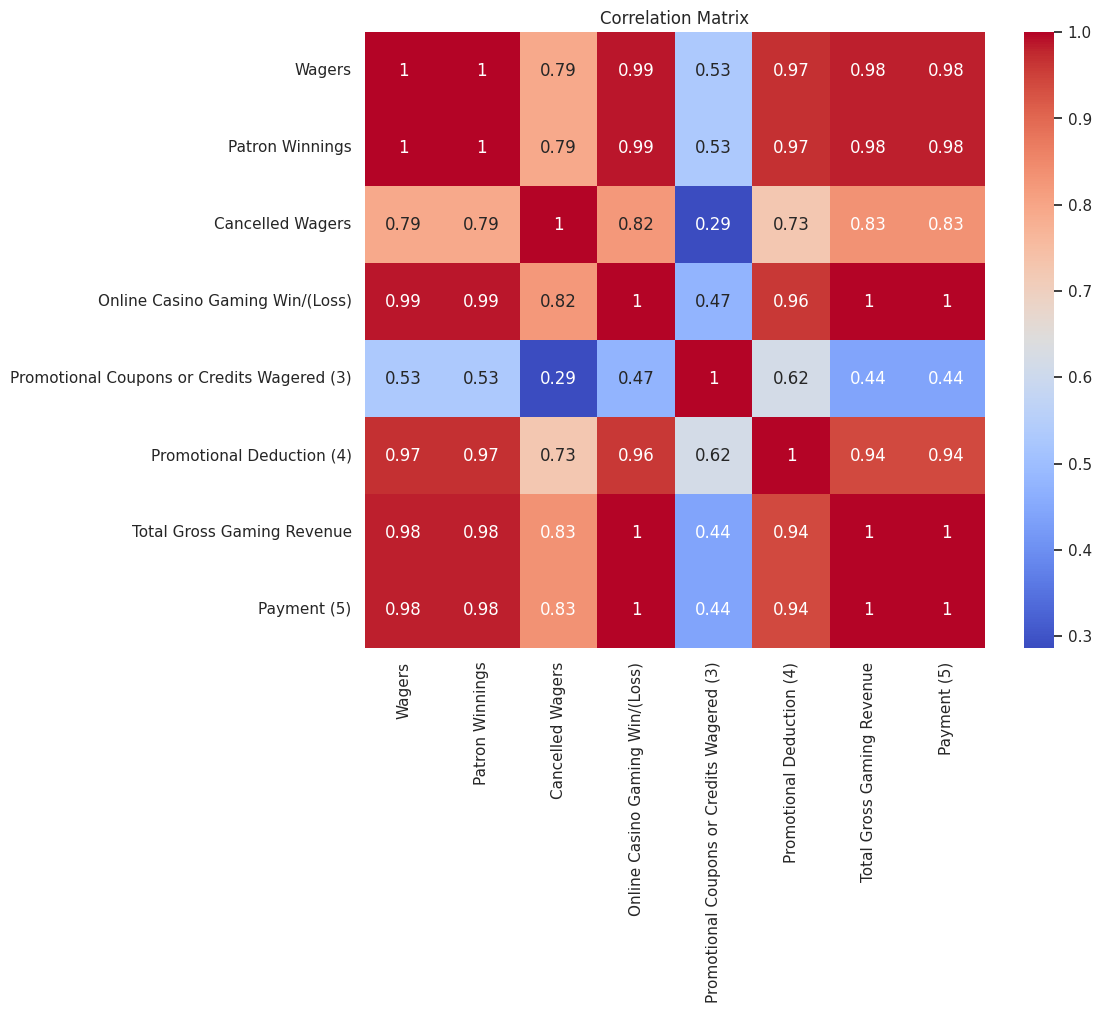

In [41]:
## Correlation Analysis
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

💡 **Key Insights:**

1. **Revenue Trends:**  
     -  Monthly revenue showed seasonal spikes around December and March,
        suggesting peak engagement periods.
     -  There was a noticeable upward trend in the latter half of the fiscal
        year.

2. **Licensee Performance:**
     -  A few licensees consistently dominated the revenue chart.
     -  Some casinos underperformed across several months - potential  
        candidates for operational review.

3. **Promotional Spending Impact:**
     -  Moderate positive correlation between promotional deductions and total
        gross gaming revenue.
     -  However, some casinos spent heavily on promotions without a significant
        gain in net winnings.

4. **Wagering Patterns:**
     -  High variance observed in the percentage of patrons winnings returned.
     -  Cancelled wagers had a slight negative correlation with revenue,
        indicating they may reduce total earnings marginally.

✅ **Recommendations:**  
-  Increase promotional budgets strategically during high-performing months to
   maximize ROI.
-  Re-evaluate promotion strategy for casinos with high promo spend but low
   returns.
-  Monitor underperforming licensees and provide support or strategy audits.
-  Investigate reasons for high cancellation rates in specific periods.
-  Consider deeper analysis into player segmentation and targeted promotions.